# Pandas plotting

"Pandas" allows you to plot data stored in it directly. This function can be beneficial if you are working with unknown data. It is standard practice in machine learning to visualize the data and study it before starting work on it. Here, we discuss a few ways to visualize data using pandas.

## Line graphs
This type of graph is the kind of plot you imagine when you think about the stock market. This type of data is usually time-series data, which means that you look at how the data behaves as a function of time.

In [ ]:
import pandas as pd
import numpy as np


df = pd.DataFrame(np.random.randn(1000, 2), columns=['My weight', 'C']).cumsum()
df['no of days'] = pd.Series(list(range(1000)))

You can ignore the above code if you want because the code is generating random data. First, we create a new DataFrame df, and then fill the columns B and C with 1000 random numbers. The "2" after the number thousand indicates the two columns. The method `cumsum()` stands for cumulative sum. Thus for every new number randomly generated, the function adds it to the previous number.

After this, we create column A which is just integers from 0 to 1000.

Let us look at the finished data.

In [ ]:
df.head()

,My weight,C,no of days
0,1.276286,-1.262217,0
1,2.189809,-2.402414,1
2,0.986368,-3.758331,2
3,0.669303,-4.756384,3
4,0.867726,-4.895289,4


As you can imagine, there are random numbers on the first two columns, and the last column represents time. Let us plot this data.

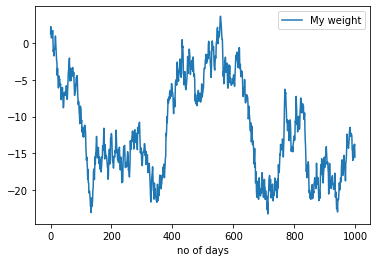

In [ ]:
df.plot(x='no of days', y='My weight')

Here, we plotted only the column B. If you want to see both graphs of B and C, we can use the following command.

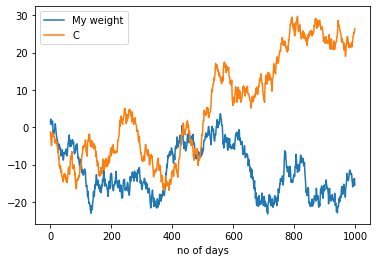

In [ ]:
df.plot(x='no of days')

## Scatter plots
These are very helpful in visualizing how two variables interact. Let us create some data first.

In [ ]:
df = pd.DataFrame(np.random.rand(50, 1), columns=['a'])
df['b']= pd.Series(list(range(50)))

The first line creates the DataFrame of one column and 50 data points. Then the second column is simply a multiple of the first column. Let us see what the DataFrame looks like.

In [ ]:
df.head()

,a,b
0,0.813054,0
1,0.899619,1
2,0.656288,2
3,0.448172,3
4,0.034532,4


Now let's make a scatter plot.

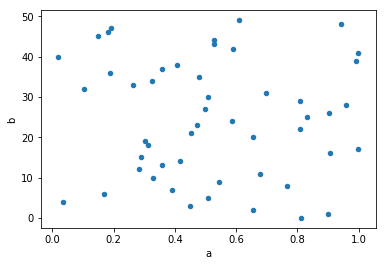

In [ ]:
df.plot.scatter(x='a', y='b')

This is what uncorrelated data looks like. It is "scattered" all around the plot. Uncorrelated means that the two features are not dependent on each other. Let us make them dependent, so what we can see how the plot changes.

In [ ]:
df['a']= df['a']+df['b']

We have made column 'a' dependent on column 'a'. Column 'a' is itself column 'b'. Let us see the plot.

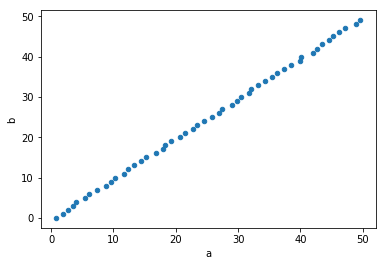

In [ ]:
df.plot.scatter(x='a', y='b')

You can see that as 'a' increases 'b' is also increasing similarly. As a result, using the plot, we can see that the two features are correlated. In machine learning, we usually throw away highly correlated data like this.

## Histograms
These are useful to see how frequently datapoints occur. Let us create some data.

In [ ]:
df = pd.DataFrame({'a': np.random.randn(1000), 'b': np.random.randn(1000)})

The above line create 1000 random numbers for column 'a', and 'b'. Let us look how frequently each datapoint occurs.

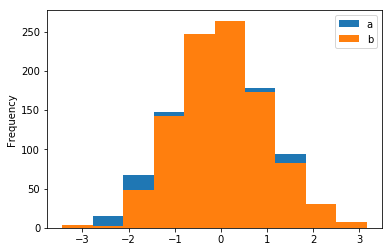

In [ ]:
df.plot.hist()

As you can see, the x-axis shows the different numbers, and the y-axis shows how frequently they occur in the data. The orange bar shows the column 'b,' and the blue bar shows column 'a.'

The graph of 'a' is a little hidden. If we want to see the graph of 'a' better, we can use the alpha parameter, which determines transparency.

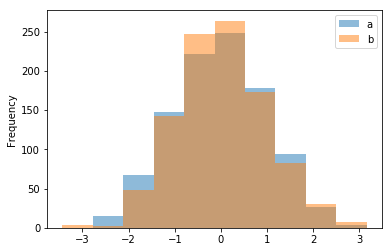

In [ ]:
df.plot.hist(alpha=0.5)

In [ ]:
# Histogram with multiple bars

In [ ]:
import pandas as pd
coins = ['penny', 'nickle', 'dime', 'quarter']
worth = [0.01, 0.05, 0.10, 0.25]
df = pd.DataFrame(worth, columns=['1x'], index=coins)
df['2x'] = df['1x'] * 2
df['3x'] = df['1x'] * 3
df['4x'] = df['1x'] * 4
df['5x'] = df['1x'] * 5

In [ ]:
df

,1x,2x,3x,4x,5x
penny,0.01,0.02,0.03,0.04,0.05
nickle,0.05,0.10,0.15,0.20,0.25
dime,0.10,0.20,0.30,0.40,0.50
quarter,0.25,0.50,0.75,1.00,1.25


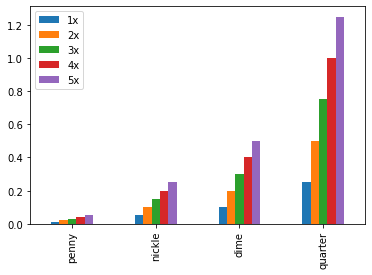

In [ ]:
import matplotlib.pyplot as plt

df.plot.bar()
plt.show()

## Correlation matrices
These are essential tools in machine learning. Like we said before, we often need to weed out correlated features and throw them away. The scatter plot helps us visualize 2 features at once, but the correlation matrix can do so for any number of features.

Let us build a dataframe.

In [ ]:
df = pd.DataFrame(list(range(50)), columns=['a'])
df['b'] = pd.Series(np.random.rand(50))
df['c'] = pd.Series(np.random.rand(50))
df['d'] = pd.Series(np.random.rand(50))
df['e'] = pd.Series(np.random.rand(50))

Can you pick out which features are correlated?

The answer is, none. Right now, all numbers are random, except column 'b.' But still, there is no other column like column 'b,' so it is uncorrelated. Let us insert some correlation into 'c' and 'e,' and high correlation into 'b' and 'd.' 'a' remains uncorrelated.

In [ ]:
df['c'] = df['c'] + 0.5 * df['e']
df['b'] = df['b'] + df['d']

Now let us plot a correlation matrix.

In [ ]:
df.corr()

,a,b,c,d,e
a,1.000000,0.284311,-0.124045,0.135367,-0.282484
b,0.284311,1.000000,-0.069390,0.709334,0.001895
c,-0.124045,-0.069390,1.000000,-0.079350,0.236537
d,0.135367,0.709334,-0.079350,1.000000,-0.121588
e,-0.282484,0.001895,0.236537,-0.121588,1.000000


As you can see, "Pandas" outputs a matrix that shows correlation. If the number is 1, it is highly correlated, and if it 0, there is no correlation. If it is negative, there is a negative correlation, which means that as one feature increases, the other decreases.

To plot this matrix, we need to use another library called matplotlib. For the demonstration, we are using the code here. The upcoming chapters include detail on this library.

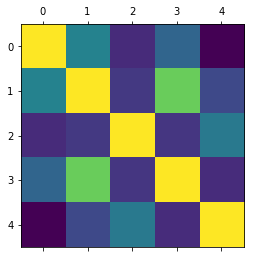

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

The code `matshow()` stands for "matrix show". It takes the correlation matrix and plots it. If you look along the diagonal, there is a high correlation. In the correlation matrix, the diagonals include the correlation of the feature with itself, which is always 1. Thus the diagram shows bright spots for this correlation.

As you can see, the other columns that are slightly correlated, are brighter. This helps us visually identify correlation in the data.

## References
### Documentation
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

### Tutorial
- [Pandas and matplotlib](https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c)